In this file we will expolore our dataset from "Students" of Drexel students answering the question "What are the student's strengths?"

In [1]:
#Importing necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

In [2]:
# Importing datasets and print sheet names
xls = pd.ExcelFile('/Users/otabekjuraev/OneDrive - Sejong University/DREXEL/Courses/MIS/Week 3/dataset/student_data.xlsx')
xls.sheet_names



['Classroom Activities Question',
 'Coursework Question',
 'Most Imp Skills',
 'Skills to develop',
 'What made job interesting',
 'Learn & Focus on']

In [3]:
df = xls.parse('Skills to develop')
df

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Major Conc,Co-op #,Citizenship Status,Skills to develop
0,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,None
1,29,201415-201425,SR,B,ACCT,4COP,NaN,Only,US Citizen,My social skills. I do believe I socialize wel...
2,55,201415-201425,JR,B,ACCT,5COP,NaN,Third,US Citizen,Leadership and being more talkative (networking).
3,61,201425-201425,JR,B,BAE,5COP,NaN,Second,Non US Citizen,I will need to study more writing and organiza...
4,60,201415-201415,JR,B,BAE,5COP,NaN,Second,Non US Citizen,I will need to obtain more skills in using bus...
...,...,...,...,...,...,...,...,...,...,...
1424,5921,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,I believe that I need to work more on Merchand...
1425,5922,201435-201435,JR,B,MKTG,5COP,NaN,First,Non US Citizen,I improved my communication skills during this...
1426,5932,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,I think I can learn most aspects of a position...
1427,5938,201435-201445,PJ,B,GBUS,4COP,NaN,Only,US Citizen,"Well, this experience was a crash-course in or..."


In [4]:
# So we have 1429 rows and 10 columns in our dataset.

In [5]:
df.shape

(1429, 10)

In [6]:
# Checking for missing values in columns
df.isnull().sum()

Respondent ID            0
Work Terms               0
Class (BOT)              0
College Code             0
Major Code               0
Coop Conc                0
Major Conc            1398
Co-op #                  0
Citizenship Status       0
Skills to develop       10
dtype: int64

In [7]:
# We have 1398 missing values in "Major Conc" column, since don't neet this data we delete it from our dataframe.
try:
    df.isnull().sum()
    df = df.drop("Major Conc", axis=1)
except:
    print("Completed")


# Delete rows with missing values

In [8]:
df = df.dropna()

In [12]:
# This is how our target text data looks like. 1419 rows of valid data left
df

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Co-op #,Citizenship Status,Skills to develop
0,11,201415-201425,JR,B,FIN,4COP,Only,US Citizen,None
1,29,201415-201425,SR,B,ACCT,4COP,Only,US Citizen,My social skills. I do believe I socialize wel...
2,55,201415-201425,JR,B,ACCT,5COP,Third,US Citizen,Leadership and being more talkative (networking).
3,61,201425-201425,JR,B,BAE,5COP,Second,Non US Citizen,I will need to study more writing and organiza...
4,60,201415-201415,JR,B,BAE,5COP,Second,Non US Citizen,I will need to obtain more skills in using bus...
...,...,...,...,...,...,...,...,...,...
1424,5921,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,I believe that I need to work more on Merchand...
1425,5922,201435-201435,JR,B,MKTG,5COP,First,Non US Citizen,I improved my communication skills during this...
1426,5932,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,I think I can learn most aspects of a position...
1427,5938,201435-201445,PJ,B,GBUS,4COP,Only,US Citizen,"Well, this experience was a crash-course in or..."


In [13]:
#check for missiing values
df.isnull().sum()

Respondent ID         0
Work Terms            0
Class (BOT)           0
College Code          0
Major Code            0
Coop Conc             0
Co-op #               0
Citizenship Status    0
Skills to develop     0
dtype: int64

In [14]:
# No missing values in our dataset

# Working on removing contraction words

Before removing all punctuation we will convert contractions into whole words not to lose some information.

"Contractions are a unique type of word that combines two or more other words in a shortened form, 
usually with an apostrophe. Contractions take words that usually go together, 
like can not or I have, and then remove certain letters to shorten them and make other words, like can’t or I’ve." (Source: https://www.grammarly.com/blog/contractions/)

It is useful to keep those word in order to keep sentiment of the sentences.

In [15]:
import contractions

In [16]:
contractions_re=re.compile('(%s)' % '|'.join(contractions.contractions_dict.keys()))

In [17]:
contractions.contractions_dict.keys()

dict_keys(["I'm", "I'm'a", "I'm'o", "I've", "I'll", "I'll've", "I'd", "I'd've", 'Whatcha', "amn't", "ain't", "aren't", "'cause", "can't", "can't've", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", 'didn’t', "don't", 'don’t', "doesn't", "e'er", "everyone's", 'finna', 'gimme', "gon't", 'gonna', 'gotta', "hadn't", "hadn't've", "hasn't", "haven't", "he've", "he's", "he'll", "he'll've", "he'd", "he'd've", "here's", "how're", "how'd", "how'd'y", "how's", "how'll", "isn't", "it's", "'tis", "'twas", "it'll", "it'll've", "it'd", "it'd've", 'kinda', "let's", 'luv', "ma'am", "may've", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've", "ne'er", "o'", "o'clock", "ol'", "oughtn't", "oughtn't've", "o'er", "shan't", "sha'n't", "shalln't", "shan't've", "she's", "she'll", "she'd", "she'd've", "should've", "shouldn't", "shouldn't've", "so've", "so's", "somebody's", "someone's", "something's", 'sux', "that're", "

In [18]:
dt = contractions.contractions_dict
def update_text(text):
    for key in dt:
        text = re.sub(key, dt[key], text)
    return text

In [19]:
def expand_contractions(text,contractions_dict=contractions.contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [21]:
df["Skills to develop"]

0                                                    None
1       My social skills. I do believe I socialize wel...
2       Leadership and being more talkative (networking).
3       I will need to study more writing and organiza...
4       I will need to obtain more skills in using bus...
                              ...                        
1424    I believe that I need to work more on Merchand...
1425    I improved my communication skills during this...
1426    I think I can learn most aspects of a position...
1427    Well, this experience was a crash-course in or...
1428    I need to learn how to use Quickbook and advan...
Name: Skills to develop, Length: 1419, dtype: object

In [22]:
df["processed"] = df["Skills to develop"].apply(lambda x: update_text(x))
df.sample(10)

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Co-op #,Citizenship Status,Skills to develop,processed
319,3933,201415-201425,JR,B,FIN,5COP,Third,US Citizen,Better financial skills.,Better financial skills.
1188,3711,201445-201445,SR,B,ACCT,4COP,Only,Non US Citizen,"For my future career, I want to develop a comp...","For my future career, I want to develop a comp..."
1313,4810,201445-201445,SR,B,FIN,5COP,Third,Non US Citizen,"Demonstrated organizational skills, ability to...","Dthemonstrated organizational skills, ability ..."
648,79,201435-201445,SR,B,GBUS,5COP,Third,US Citizen,The skills i need to improve would be my publi...,The skills i need to improve would be my publi...
1060,2898,201435-201445,PJ,B,FIN,5COP,First,US Citizen,I would like to continue to work on my excel s...,I would like to continue to work on my excel s...
809,1294,201435-201445,JR,B,FIN,5COP,Second,US Citizen,The biggest skill I need to improve on is my e...,The biggest skill I need to improve on is my e...
1153,3510,201435-201445,PJ,B,ACCT,5COP,First,Non US Citizen,Writing skill and communication skill.,Writing skill and communication skill.
148,2609,201415-201425,FR,B,GBUS,5COP,First,US Citizen,I felt as if all the skills I had during this ...,I felt as if all the skills I had during this ...
1184,3679,201435-201445,SR,B,FIN,4COP,Only,Non US Citizen,Excel skills and communication skills.,Excel skills and communication skills.
263,3537,201415-201425,SO,B,MKTG,5COP,First,Non US Citizen,I think that I need to work on my leadership s...,I think that I need to work on my leadership s...


# Lowercase the text

In [23]:
df['processed']=df["processed"].apply(lambda x: x.lower())

In [24]:
#checking results
df["processed"]

0                                                    none
1       my social skills. i do believe i socialize wel...
2       leadership and being more talkative (networking).
3       i will need to study more writing and organiza...
4       i will need to obtain more skills in using bus...
                              ...                        
1424    i believe that i need to work more on merchand...
1425    i improved my communication skills during this...
1426    i think i can learn most aspects of a position...
1427    well, this experience was a crash-course in or...
1428    i need to learn how to use quickbook and advan...
Name: processed, Length: 1419, dtype: object

# Remove all digits

In [25]:
df['processed']=df['processed'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))
#checking results
df["processed"]

0                                                    none
1       my social skills. i do believe i socialize wel...
2       leadership and being more talkative (networking).
3       i will need to study more writing and organiza...
4       i will need to obtain more skills in using bus...
                              ...                        
1424    i believe that i need to work more on merchand...
1425    i improved my communication skills during this...
1426    i think i can learn most aspects of a position...
1427    well, this experience was a crash-course in or...
1428    i need to learn how to use quickbook and advan...
Name: processed, Length: 1419, dtype: object

## Remove special characters

In [26]:
df['processed']=df['processed'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', str(x)))

In [27]:
df["processed"]

0                                                    none
1       my social skills i do believe i socialize well...
2         leadership and being more talkative networking 
3       i will need to study more writing and organiza...
4       i will need to obtain more skills in using bus...
                              ...                        
1424    i believe that i need to work more on merchand...
1425    i improved my communication skills during this...
1426    i think i can learn most aspects of a position...
1427    well this experience was a crash course in org...
1428    i need to learn how to use quickbook and advan...
Name: processed, Length: 1419, dtype: object

## Unnecessary words

# Removing punctuations

In [28]:
df['processed'] = df['processed'].apply(lambda i: re.sub('[%s]' % re.escape(string.punctuation), '', str(i)))

In [29]:
#Checking the results
df['processed'].sample(10)

1379    there is always room for improvthement and lea...
658     i just recently became involved with a data vi...
1004    i need to work on prioritizing and time managt...
1331               excel and similar technology platforms
291     work to improve the existing ones by asking fo...
808     i would like to learn more accounting and beco...
1134    keep working on excel to become and expert on ...
585              my technical skills and mathmatic skills
36      my communication skills improved greatly as di...
1333    i would like to focus on improving my leadersh...
Name: processed, dtype: object

# Removing extra spaces between words

In [30]:
df.loc['processed']=df['processed'].apply(lambda i: re.sub(' +',' ',i))

In [31]:
# Checking results
df["processed"].sample(10)

917     i would love to learn more about analytics i h...
1385                                    time managthement
597     i think i need to learn more about the financi...
857     i would like to gain more experience in excel ...
717     i would like to improve my communication skill...
769                                         communication
290     public speaking skills it is still a weakness ...
931     i intend to focus a bit more on computer scien...
598     i think it might be helpful to continue improv...
1071                           presentation communication
Name: processed, dtype: object

# Removing Stop words

In [32]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [34]:
txt = df['processed'].values[10]
i =0
for token in list(nlp(txt)):
    print(i+1,":", token, token.is_stop, token.lemma_)
    i = i+1
#checking the results

1 : one True one
2 : can True can
3 : always True always
4 : improve False improve
5 : efficency False efficency
6 : in True in
7 : reading False read
8 : comprehension False comprehension
9 : and True and
10 : alaysis False alaysis


#  Lemmitazation 
# Removing stop words  
# Correcting misspelled words

In [35]:
from textblob import TextBlob
def rem_stop_words_lemmatizing(txt):
    ans = []
    for token in nlp(txt):
        # Cheking and removing stop words
        if not token.is_stop:
            # This part lemmatizes words, checks misspelled words and corrects them
            ans.append(str(token.lemma_))
    return " ".join([word for word in ans])

In [36]:
# df['lemmatized']=df['processed'].apply(lambda i: ' '.join([token.lemma_ for token in list(nlp(i)) if (token.is_stop==False)]))
df['lemmatized'] = df['processed'].astype(str).apply(lambda x: rem_stop_words_lemmatizing(x))


In [37]:
# Checking the results
df.sample(15)["lemmatized"]

1064    think need well excel sql server user order we...
894                                         finance class
104                    go similar job improve team spirit
379     little independent decembersion making like im...
133     definitely need thorough check work little mis...
744                                   excel skill greatly
281                                    presentation skill
457                                  accounting knowledge
1310     term time position love improve leadership skill
165                      time attentive professional late
1216                                  excel communication
203     improve word excel skill learn lot cool trick ...
1321    definitely communication strategic skill lack ...
1357                          ask question write question
351     need marcheting class position basic need succeed
Name: lemmatized, dtype: object

In [39]:
# Checking results
print("Edited >>:", df.loc[10, "lemmatized"])
print("Unedited >>:", df.loc[10, "processed"])


Edited >>: improve efficency read comprehension alaysis
Unedited >>: one can always improve efficency in reading comprehension and alaysis


# Vectorize preprocessed data

## N-gram (n=1)

In [40]:
# Here we will create Words frequency matrix (One-word) 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (1,1))
data_new=cv.fit_transform(df["lemmatized"])
data_new.shape
df_dtm_1 = pd.DataFrame(data_new.toarray(), columns=cv.get_feature_names_out())
df_dtm_1.index=df.index
df_dtm_1.head(3)

,ability,able,abroad,absolutely,acadthemic,accelerated,accept,access,accident,acclimate,...,worry,write,writing,written,wrong,xray,year,yes,young,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## N-gram (n=2)

In [41]:
# Here we will create Words frequency matrix (Two word)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (2,2))
data_new=cv.fit_transform(df["lemmatized"])
data_new.shape
df_dtm = pd.DataFrame(data_new.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df.index
df_dtm.head(3)

,ability accommodate,ability analyze,ability attention,ability basic,ability code,ability communicate,ability confident,ability creat,ability decembersive,ability express,...,year place,year prepare,year see,yes time,young age,young professional,zone diving,zone early,zone network,zone room
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize data

## Word Cloud

In [42]:
from wordcloud import WordCloud
from textwrap import wrap

## Word Cloud One-word

In [43]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

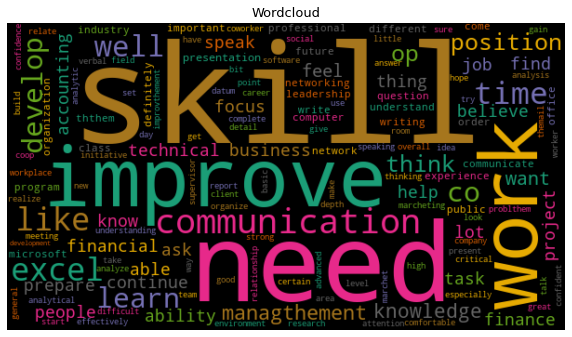

In [44]:
generate_wordcloud(data = df_dtm_1.sum(axis=0).to_dict(), title = "Wordcloud")

# Word frequency bar chart One-word

## Removing unnecessary words

In [49]:
word_freqs_1 = df_dtm_1.sum(axis=0).sort_values(ascending=False)[:30].to_dict()



word_freqs_1
banned = ["co", "lot", "op", "datum", "work", "need", "help", "able", "important", "ability","skill", "improve", "like", "well", "learn", "think"]

for keys in word_freqs_1.copy():
    if keys in banned:
        del word_freqs_1[keys]


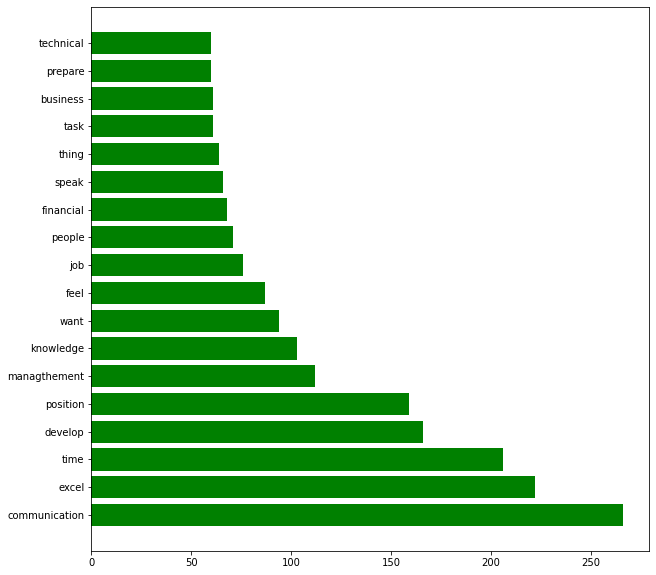

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs_1)), word_freqs_1.values(),color='green')

plt.yticks(range(len(word_freqs_1)), word_freqs_1.keys())
plt.yticks(rotation = 0)
plt.show()

## Word Cloud two-word

In [51]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

In [60]:
#banned_column = ["co op", "need work" ]
#for i in df_dtm:
 #   if df_dtm[i].values in banned_column:
  #      df_dtm.drop(column, axis=1, inplace=True)

/var/folders/f3/7kkx3wss44154l_sc0vszfkc0000gn/T/ipykernel_85395/3364907560.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if df_dtm[i].values in banned_column:


In [70]:
banned_column = ["co op", "need work", "like improve", "need learn", "skill need"]
for i in banned_column:
    try:
        df_dtm.drop(i, axis=1, inplace = True)
    except:
        continue
        

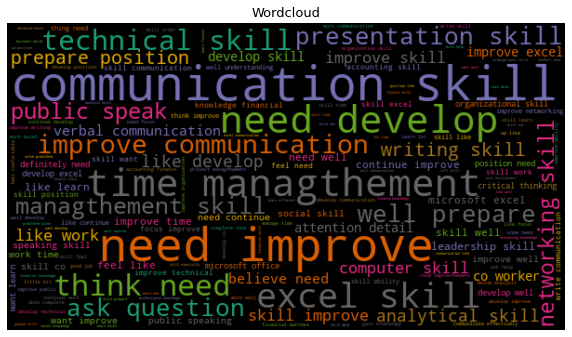

In [71]:
generate_wordcloud(data = df_dtm.sum(axis=0).to_dict(), title = "Wordcloud")

In [72]:
df_dtm.head()

,ability accommodate,ability analyze,ability attention,ability basic,ability code,ability communicate,ability confident,ability creat,ability decembersive,ability express,...,year place,year prepare,year see,yes time,young age,young professional,zone diving,zone early,zone network,zone room
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Word frequency bar chart Two-word

In [73]:
word_freqs_2 = df_dtm.sum(axis=0).sort_values(ascending=False)[:25].to_dict()


word_freqs_2

{'communication skill': 136,
 'need improve': 129,
 'need develop': 81,
 'time managthement': 80,
 'excel skill': 64,
 'think need': 47,
 'technical skill': 40,
 'improve communication': 36,
 'presentation skill': 30,
 'ask question': 29,
 'well prepare': 29,
 'managthement skill': 27,
 'public speak': 25,
 'prepare position': 23,
 'networking skill': 23,
 'writing skill': 23,
 'like develop': 21,
 'analytical skill': 21,
 'skill improve': 20,
 'computer skill': 20,
 'improve skill': 19,
 'like work': 19,
 'verbal communication': 19,
 'develop skill': 18,
 'improve excel': 18}

In [80]:
word_freqs_1
banned = ["important skill","need develop", "think need", "prepare position", "like develop", "skill improve", "like work", "co op", "skill co", "skill important", "need improve" "op communication", "datum analysis", "co worker", "people skill", "ability","skill","co op", "need work", "like improve", "need improve", "need learn", "skill need"]

for keys in word_freqs_2.copy():
    if keys in banned:
        del word_freqs_2[keys]

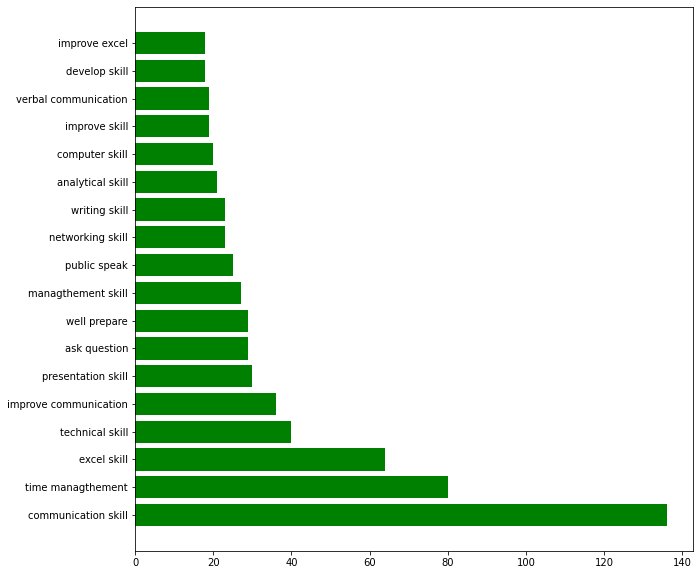

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs_2)), word_freqs_2.values(),color='green')

plt.yticks(range(len(word_freqs_2)), word_freqs_2.keys())
plt.yticks(rotation = 0)
plt.show()